In [11]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [13]:
tf.config.list_physical_devices('GPU')

[]

In [14]:
data_file = 'data'

In [15]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [16]:
for image_class in os.listdir(data_file):
    for image in os.listdir(os.path.join(data_file, image_class)):
        image_path = os.path.join(data_file, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\cats\_DS_Store
Image not in ext list data\dogs\_DS_Store


In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 10028 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

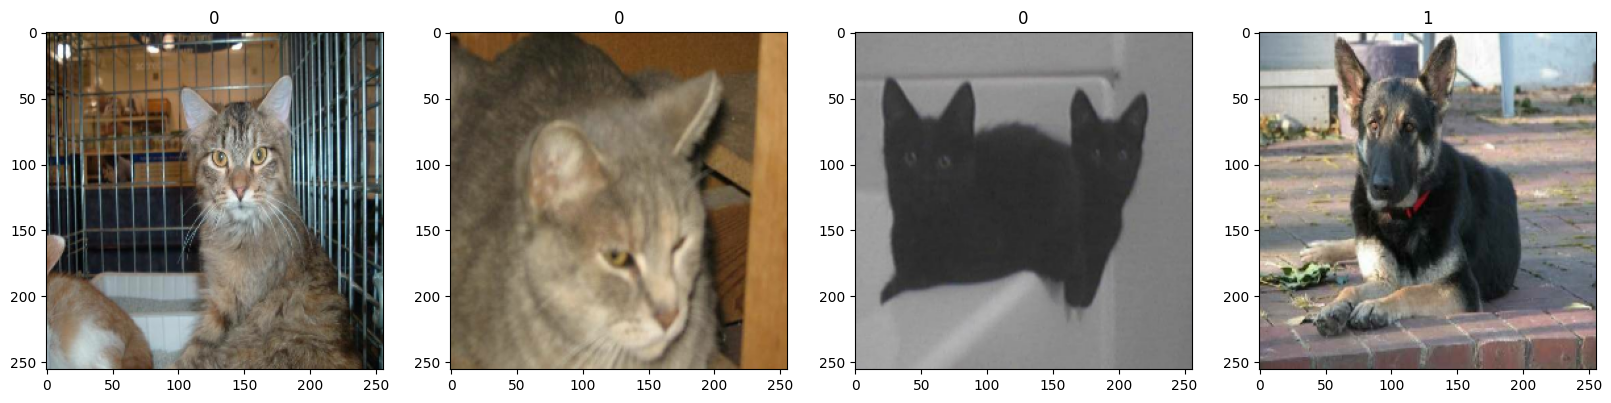

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.37924734, 0.35571793, 0.22238459],
          [0.39491877, 0.3614629 , 0.24467367],
          [0.3875943 , 0.34752077, 0.2385747 ],
          ...,
          [0.41887254, 0.29730392, 0.18039216],
          [0.38506433, 0.2634957 , 0.14977022],
          [0.41082308, 0.28925446, 0.17552897]],
 
         [[0.4090258 , 0.38487595, 0.25174943],
          [0.43039384, 0.39684102, 0.2800841 ],
          [0.43911564, 0.3990421 , 0.290096  ],
          ...,
          [0.41899535, 0.2974267 , 0.18051495],
          [0.39339   , 0.27182138, 0.1580959 ],
          [0.41331333, 0.2917447 , 0.17801921]],
 
         [[0.3743339 , 0.33903977, 0.209628  ],
          [0.38857278, 0.35327867, 0.2371022 ],
          [0.41104904, 0.37097552, 0.26202944],
          ...,
          [0.42092094, 0.29935232, 0.18244055],
          [0.40546063, 0.28389198, 0.17016649],
          [0.41896686, 0.29739824, 0.18367274]],
 
         ...,
 
         [[0.8333587 , 0.82551557, 0.8451234 ],
          [0.82732

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

219

In [25]:
val_size

62

In [26]:
test_size

31

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
219/219 [==============================] - 126s 568ms/step - loss: 0.6526 - accuracy: 0.5982 - val_loss: 0.6067 - val_accuracy: 0.6557
Epoch 2/20
219/219 [==============================] - 117s 533ms/step - loss: 0.5724 - accuracy: 0.6975 - val_loss: 0.5769 - val_accuracy: 0.7082
Epoch 3/20
219/219 [==============================] - 116s 528ms/step - loss: 0.4856 - accuracy: 0.7661 - val_loss: 0.5536 - val_accuracy: 0.7293
Epoch 4/20
219/219 [==============================] - 118s 536ms/step - loss: 0.3845 - accuracy: 0.8172 - val_loss: 0.5358 - val_accuracy: 0.7485
Epoch 5/20
219/219 [==============================] - 115s 525ms/step - loss: 0.2712 - accuracy: 0.8848 - val_loss: 0.6248 - val_accuracy: 0.7530
Epoch 6/20
219/219 [==============================] - 123s 562ms/step - loss: 0.1627 - accuracy: 0.9361 - val_loss: 0.7625 - val_accuracy: 0.7566
Epoch 7/20
219/219 [==============================] - 133s 607ms/step - loss: 0.0939 - accuracy: 0.9686 - val_loss: 0.9948 -

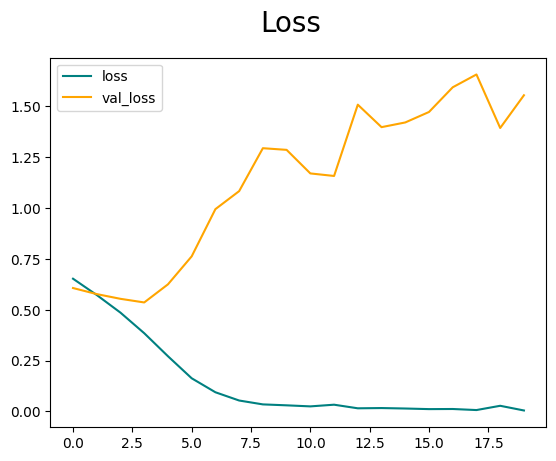

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

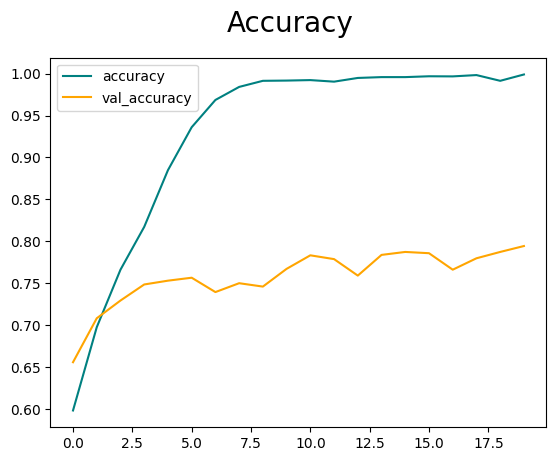

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

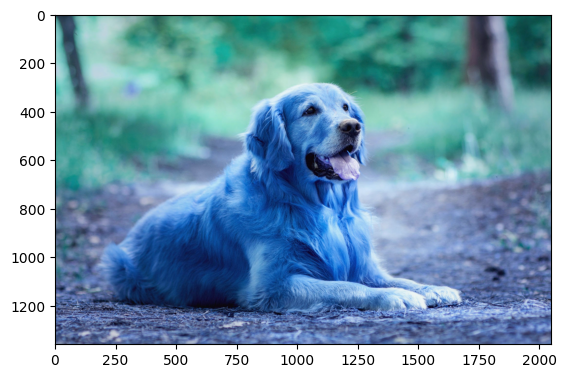

In [38]:
img = cv2.imread('154006829.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(img)
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 94ms/step


array([[0.99995756]], dtype=float32)

In [40]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


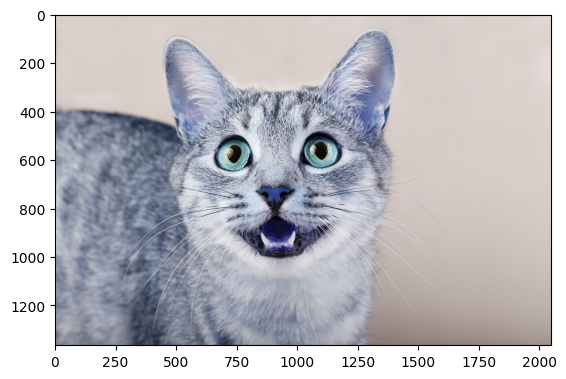

In [48]:
img = cv2.imread('8iAb9k4aT.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(img)
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 32ms/step


array([[1.4806469e-07]], dtype=float32)

In [50]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat
